In [5]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (14, 10)

import matplotlib.font_manager as fm 
fm.get_fontconfig_fonts()
font_location = 'NanumBarunGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family='NanumBarunGothicBold')


### 데이터 불러오기

In [6]:
DATA_DIR = "data\고소차 Data"
filename = "\\20191101_20200318 tele_car_req.xlsx"
fpath = DATA_DIR + filename
df = pd.read_excel(fpath)
# df.drop(df["Unnamed: 0"])

In [7]:
df.drop(['arng_cnfm_emp_no', 'arng_cnfm_emp_name', 'aply_date', 'ogan_name_kor-2','ogan_name_kor-3', 'ogan_name_kor-4', 
         'actl_dept_desc', 'rgsr_dept_desc', 'up_user', 'in_user', 'rgsr_user_id', 'rgsr_user_name', 'actl_use_emp_no', 
         'actl_use_emp_name', 'work_grp_code', 'work_grp_desc', 'in_dt', 'up_dt', 'req_st_time', 'req_fin_time'], 
        axis=1, inplace = True)

df = pd.DataFrame(df, columns = ['eqp_id', 'req_no', 'proj_no', 'blk_no', 'use_date', 'req_st_date', 'req_fin_date', 
                                 'eqp_spec_code', 'eqp_req_qty', 'detl_work_desc', 'ogan_name_kor', 'arng_emp_no', 
                                 'arng_emp_name', 'work_zone_code', 'work_zone_desc', 'eqp_kind_code', 'eqp_kind_desc'])
df

,eqp_id,req_no,proj_no,blk_no,use_date,req_st_date,req_fin_date,eqp_spec_code,eqp_req_qty,detl_work_desc,ogan_name_kor,arng_emp_no,arng_emp_name,work_zone_code,work_zone_desc,eqp_kind_code,eqp_kind_desc
0,N-182,20191021020,2479,80B,20191024,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
1,N-182,20191021020,2479,80B,20191025,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
2,N-182,20191021020,2479,80B,20191026,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
3,N-182,20191021020,2479,80B,20191027,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
4,N-182,20191021020,2479,80B,20191028,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54085,S-112,20200131012,4321,NaN,20200227,20200201,20200302,12M,2,발판 설치 및 해체,덕산기업(주)-덕산상선1반,383525,주효권,11,2도크 P.E 1공장,S,리프트카
54086,S-112,20200131012,4321,NaN,20200228,20200201,20200302,12M,2,발판 설치 및 해체,덕산기업(주)-덕산상선1반,383525,주효권,11,2도크 P.E 1공장,S,리프트카
54087,S-112,20200131012,4321,NaN,20200229,20200201,20200302,12M,2,발판 설치 및 해체,덕산기업(주)-덕산상선1반,383525,주효권,11,2도크 P.E 1공장,S,리프트카
54088,S-112,20200131012,4321,NaN,20200301,20200201,20200302,12M,2,발판 설치 및 해체,덕산기업(주)-덕산상선1반,383525,주효권,11,2도크 P.E 1공장,S,리프트카


In [8]:
df['proj_no'] = df['proj_no'].astype('str')

df['eqp_spec_code'] = df['eqp_spec_code'].astype('str')

df['work_zone_code'] = df['work_zone_code'].astype('str')
# df['work_grp_code'] = df['work_grp_code'].astype('str')

df['req_fin_date'] = df['req_fin_date'].astype('str')
df['req_st_date'] = df['req_st_date'].astype('str')
df['use_date'] = df['use_date'].astype('str')

df = df.sort_values(['use_date', 'req_no', 'eqp_id'])

### 사용시작일, 사용종료일, 시작일 차이 계산

In [9]:
sample_df = df[['eqp_id', 'req_no', 'proj_no', 'use_date', 'req_st_date', 'req_fin_date', 'eqp_spec_code', 'eqp_req_qty', 
                'ogan_name_kor', 'work_zone_code', 'work_zone_desc', 'eqp_kind_code']].copy()
sample_df['req_st_date'] = pd.to_datetime(sample_df['req_st_date'])
sample_df['req_fin_date'] = pd.to_datetime(sample_df['req_fin_date'])
sample_df['use_date'] = pd.to_datetime(sample_df['use_date'])

sample_df = sample_df.groupby(['proj_no', 'req_no', 'eqp_id']).first().reset_index()


sample_df['days_of_req'] = sample_df['req_fin_date'] - sample_df['req_st_date']
sample_df['days_before_work'] = sample_df['use_date'] - sample_df['req_st_date']
sample_df['days_after_work'] = sample_df['req_fin_date'] - sample_df['use_date']


sample_df['days_of_req'] = sample_df['days_of_req'].dt.days
sample_df['days_before_work'] = sample_df['days_before_work'].dt.days
sample_df['days_after_work'] = sample_df['days_after_work'].dt.days


sample_df


,proj_no,req_no,eqp_id,use_date,req_st_date,req_fin_date,eqp_spec_code,eqp_req_qty,ogan_name_kor,work_zone_code,work_zone_desc,eqp_kind_code,days_of_req,days_before_work,days_after_work
0,-,20191031022,N-609,2019-11-01,2019-11-01,2019-11-01,38M,1,금호테크니칼-WASH G청소반,42,G1안벽,N,0,0,0
1,-,20191108020,N-298,2019-11-09,2019-11-09,2019-11-10,28M,1,금호테크니칼주식회사,52,LNGC물류센터,N,1,0,1
2,-,20191121009,N-308,2019-11-23,2019-11-23,2019-11-24,28M,1,금호테크니칼주식회사,52,LNGC물류센터,N,1,0,1
3,-,20191121009,N-340,2019-11-23,2019-11-23,2019-11-24,28M,1,금호테크니칼주식회사,52,LNGC물류센터,N,1,0,1
4,-,20191128032,N-298,2019-11-30,2019-11-30,2019-12-01,26M,2,금호테크니칼주식회사,52,LNGC물류센터,N,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,PAS,20191230017,N-447,2019-12-31,2019-12-31,2019-12-31,15M,1,전기지원반,113,중조립공장(PAS),N,0,0,0
4054,PMS,20200103017,N-389,2020-01-04,2020-01-04,2020-01-04,22M,1,전기지원반,90,배관제작1공장,N,0,0,0
4055,POS2,20191230031,N-313,2020-01-01,2020-01-01,2020-01-02,38M,1,전기지원반,100,선행의장2공장(POS#2),N,1,0,1
4056,POS2,20191230032,N-389,2020-01-01,2020-01-01,2020-01-02,28M,1,전기지원반,100,선행의장2공장(POS#2),N,1,0,1


### 1) 사용시작일 ~ 실제 사용일 까지 걸리는 시간 (일자)
######    사용시작일에 바로 일을 시작한 경우는 제외 (days_before_work : > 0)

findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.


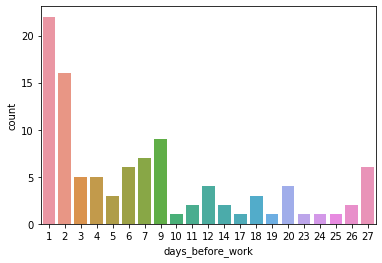

In [10]:
ax = sns.countplot(x='days_before_work', data=sample_df[sample_df['days_before_work'] > 0])
# plt.rc('font', family='NanumBarunGothicBold')
# # ax.set_xlabel('사용시작일 ~ 사용일')
# ax.set_xlabel('Days before work')
# ax.set_ylabel('Count')

### 2) 사용일 부터 사용종료일 까지의 시간 (일자)

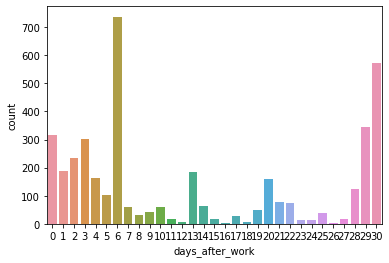

In [11]:
sns.countplot(x='days_after_work', data=sample_df)

### 3) 사용시작일 부터 사용종료일 까지의 시간 (일자)

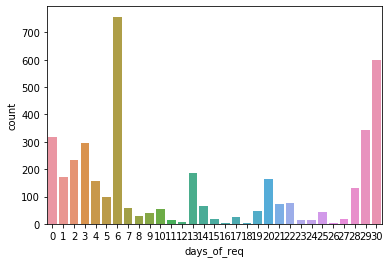

In [12]:
sns.countplot(x='days_of_req', data=sample_df)

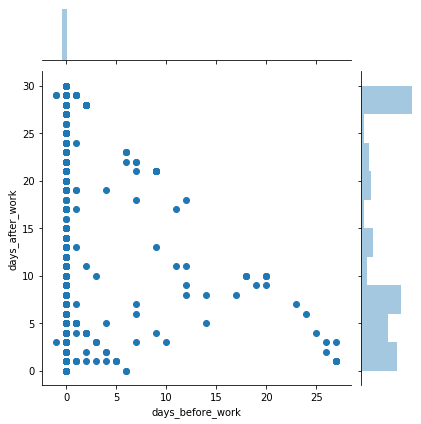

In [13]:
sns.jointplot(x="days_before_work", y="days_after_work", data=sample_df)

### 프로젝트 코드별 날짜 카운트

#### - 시작요청일로부터 실제 일을 시작하기까지 걸린 시간

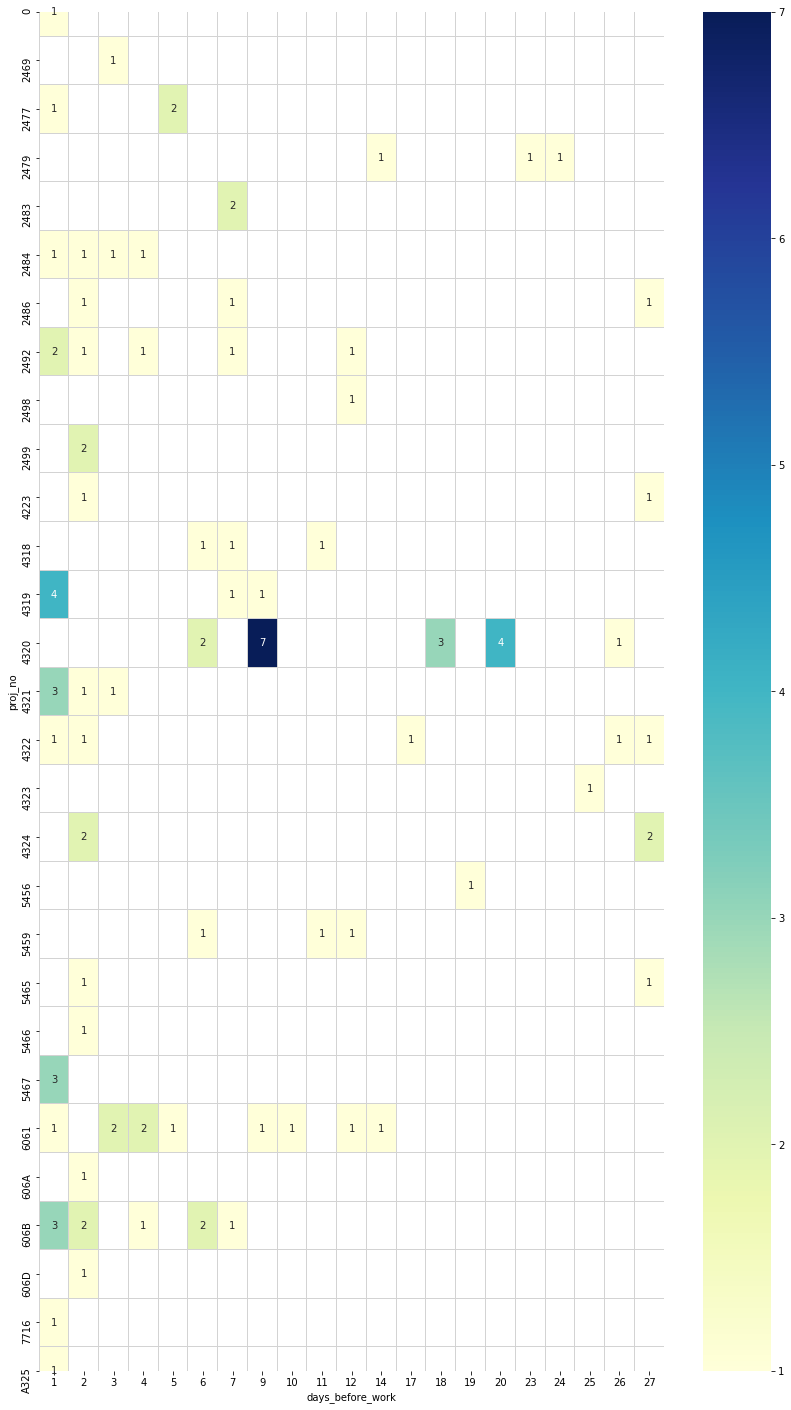

In [33]:
proj_df = sample_df[sample_df['days_before_work'] > 0]
proj_df = proj_df.groupby(['proj_no', 'days_before_work']).agg({'days_before_work': 'count'}).rename(columns={'days_before_work':'count'}).reset_index()
proj_df = proj_df.pivot_table(index='proj_no', columns='days_before_work', values='count', fill_value=None)

fig, ax = plt.subplots(figsize=(14, 25))
sns.heatmap(proj_df, annot=True, cmap="YlGnBu", ax=ax, linewidths=0.01, linecolor='lightgrey')

### 고소차 요청 스펙(eqp_spec_code)별 날짜 카운트

#### - 시작요청일로부터 실제 일을 시작하기까지 걸린 시간

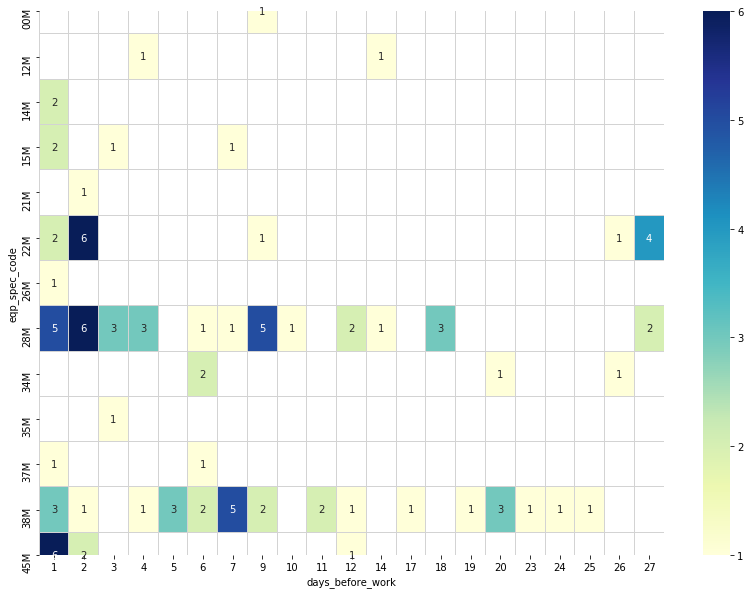

In [50]:
eqp_spec_df = sample_df[sample_df['days_before_work'] > 0]

eqp_spec_df = eqp_spec_df.groupby(['eqp_spec_code', 'days_before_work']).agg({'days_before_work': 'count'}).rename(columns={'days_before_work':'count'}).reset_index()
eqp_spec_df = eqp_spec_df.pivot_table(index='eqp_spec_code', columns='days_before_work', values='count', fill_value=None)

fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(eqp_spec_df, annot=True, cmap="YlGnBu", ax=ax, linewidths=0.01, linecolor='lightgrey')

- 실제로 일을 시작한 날부터 일을 종료하기까지 걸린 시간

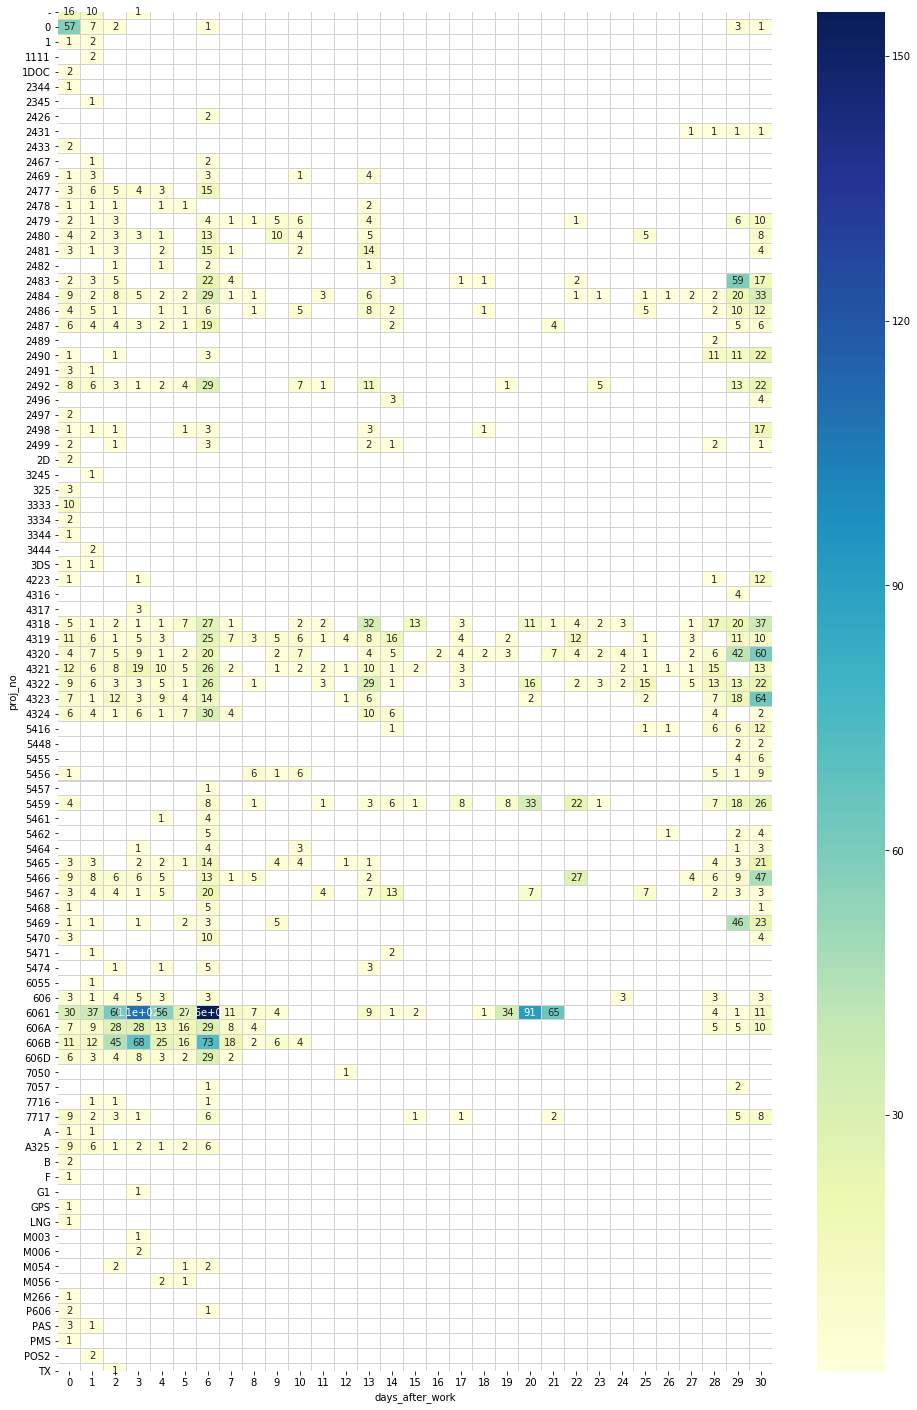

In [47]:
eqp_spec_df = sample_df

eqp_spec_df = eqp_spec_df.groupby(['proj_no', 'days_after_work']).agg({'days_after_work': 'count'}).rename(columns={'days_after_work':'count'}).reset_index()
eqp_spec_df = eqp_spec_df.pivot_table(index='proj_no', columns='days_after_work', values='count', fill_value=None)

fig, ax = plt.subplots(figsize=(16, 25))
sns.heatmap(eqp_spec_df, annot=True, cmap="YlGnBu", ax=ax, linewidths=0.01, linecolor='lightgrey')

#### - 고소차 ID 별

In [44]:
sample_df.groupby(['eqp_id']).agg({'days_before_work': ['mean', 'min', 'max', 'count'], 
                                   'days_after_work' : ['mean', 'min', 'max', 'count']})

days_before_work               days_after_work              
                   mean min max count            mean min max count
eqp_id                                                             
N-182          1.500000   0   9     6       26.833333  21  30     6
N-183          0.000000   0   0     4       29.750000  29  30     4
N-184          0.000000   0   0     8       16.625000   0  30     8
N-185          0.000000   0   0     4       29.750000  29  30     4
N-186          2.333333   0  14     6       16.833333   5  21     6
...                 ...  ..  ..   ...             ...  ..  ..   ...
S-108          0.000000   0   0     4       29.250000  28  30     4
S-109          0.000000   0   0     4       29.250000  28  30     4
S-110          0.000000   0   0     4       12.500000   3  21     4
S-111          0.000000   0   0     4       29.750000  29  30     4
S-112          0.000000   0   0     4       29.750000  29  30     4

[459 rows x 8 columns]

#### - Project_no 별

In [51]:
sample_df.groupby(['proj_no']).agg({'days_before_work' : ['mean', 'min', 'max', 'count'],
                                    'days_after_work'  : ['mean', 'min', 'max', 'count']})

days_before_work               days_after_work              
                    mean min max count            mean min max count
proj_no                                                             
-               0.000000   0   0    27        0.481481   0   3    27
0               0.014085   0   1    71        1.887324   0  30    71
1               0.000000   0   0     3        0.666667   0   1     3
1111            0.000000   0   0     2        1.000000   1   1     2
1DOC            0.000000   0   0     2        0.000000   0   0     2
...                  ...  ..  ..   ...             ...  ..  ..   ...
P606            0.000000   0   0     3        2.000000   0   6     3
PAS             0.000000   0   0     4        0.250000   0   1     4
PMS             0.000000   0   0     1        0.000000   0   0     1
POS2            0.000000   0   0     2        1.000000   1   1     2
TX              0.000000   0   0     1        2.000000   2   2     1

[92 rows x 8 columns]

### - 월별

In [53]:
sample_df['req_st_month'] = sample_df['req_st_date'].dt.month

sample_df.groupby(['req_st_month']).agg({'days_before_work': ['mean', 'max', 'min', 'count'],
                                         'days_after_work': ['mean', 'max', 'min', 'count']})

days_before_work               days_after_work              
                         mean max min count            mean max min count
req_st_month                                                             
1                    0.268590  25  -1   901       14.723640  30   0   901
2                    0.071066  12   0   788       12.953046  30   0   788
3                    0.008696   2   0   230        4.278261  15   0   230
10                   0.479339  24   0   242       20.123967  30   1   242
11                   0.322089  27  -1   919       13.035909  30   0   919
12                   0.121677  27   0   978       12.500000  30   0   978

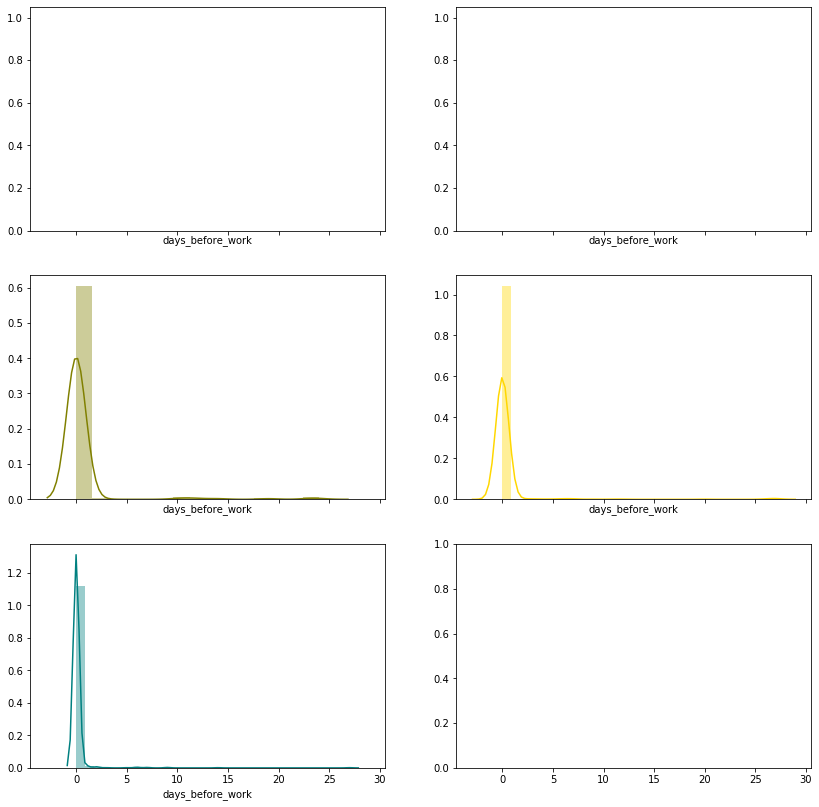

In [56]:
f, axes = plt.subplots(3, 2, figsize=(14, 14), sharex=True)

sns.distplot(sample_df[sample_df['req_st_month'] == 8]['days_before_work'], color="purple", ax=axes[0, 0])
sns.distplot(sample_df[sample_df['req_st_month'] == 9]['days_before_work'], color="skyblue", ax=axes[0, 1])
sns.distplot(sample_df[sample_df['req_st_month'] == 10]['days_before_work'] , color="olive", ax=axes[1, 0])
sns.distplot(sample_df[sample_df['req_st_month'] == 11]['days_before_work'], color="gold", ax=axes[1, 1])
sns.distplot(sample_df[sample_df['req_st_month'] == 12]['days_before_work'], color="teal", ax=axes[2, 0])

findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.


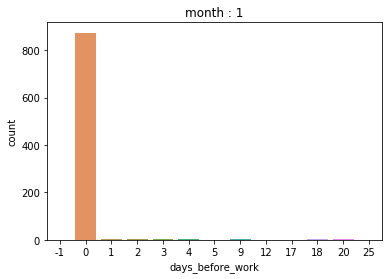

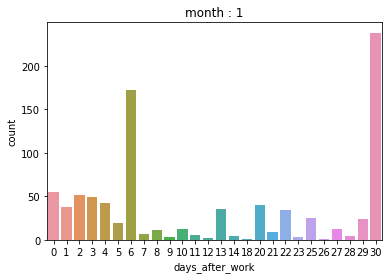

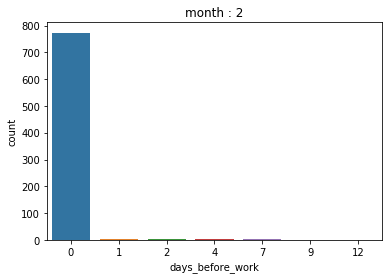

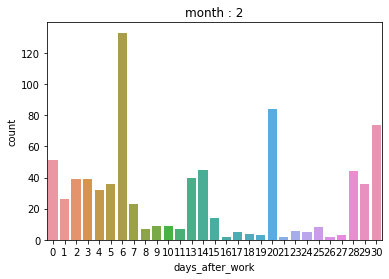

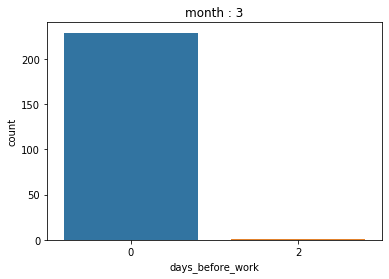

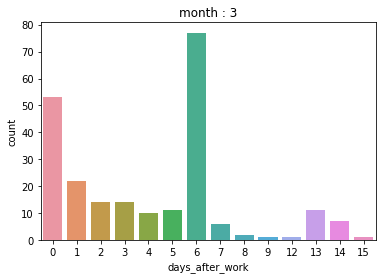

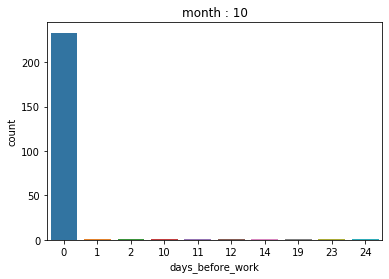

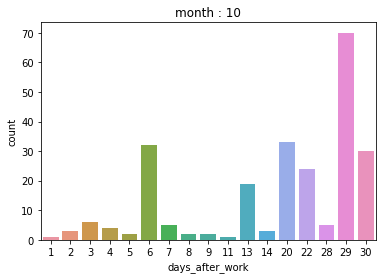

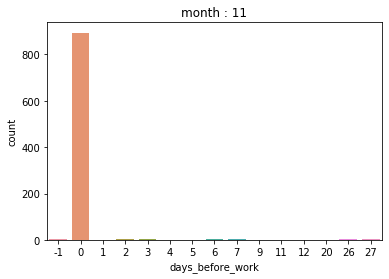

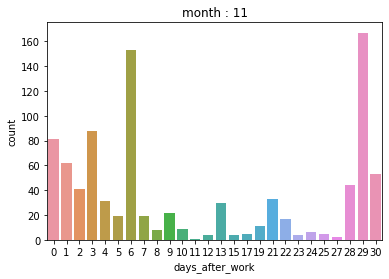

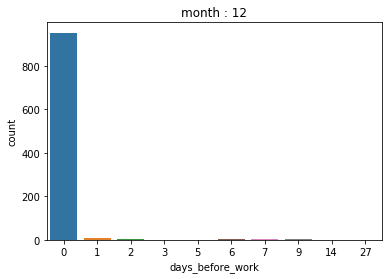

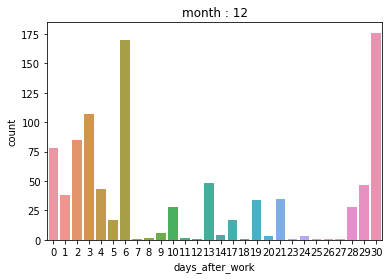

In [57]:
for month in sorted(sample_df['req_st_month'].unique()):    
    print("=" * 100)
    
    sns.countplot(x='days_before_work', data=sample_df[sample_df['req_st_month'] == month])
    plt.title("month : {}".format(month))
    plt.show()
    
    sns.countplot(x='days_after_work', data=sample_df[sample_df['req_st_month'] == month])
    plt.title("month : {}".format(month))
    plt.show()

3) 시작요청일부터 종료요청일 사이에 실제로 일한 날

In [66]:
pd.set_option('display.max_rows', None)

In [67]:
df['req_st_date'] = pd.to_datetime(df['req_st_date'])
df['use_date'] = pd.to_datetime(df['use_date'].astype('str'))
df['req_fin_date'] = pd.to_datetime(df['req_fin_date'])

In [68]:
df['req_st_month'] = df['req_st_date'].dt.month

In [69]:
grouped_df = df.groupby(['proj_no', 'req_no', 'eqp_id']).agg({'use_date': list, 
                                                              'req_st_date':'first',
                                                              'req_fin_date':'first',
                                                              'req_st_month': 'first'
                                                             }).reset_index()

In [70]:
grouped_df['date_range'] = grouped_df[['req_st_date', 'req_fin_date']].apply(lambda date: pd.date_range(start=date[0], end=date[1], freq='D'), axis=1)

In [71]:

grouped_df['work_count'] = grouped_df[['date_range', 'use_date']].apply(lambda date: sum([d in date[1] for d in date[0]]), axis=1)

In [72]:
grouped_df['date_count'] = grouped_df['date_range'].apply(len)

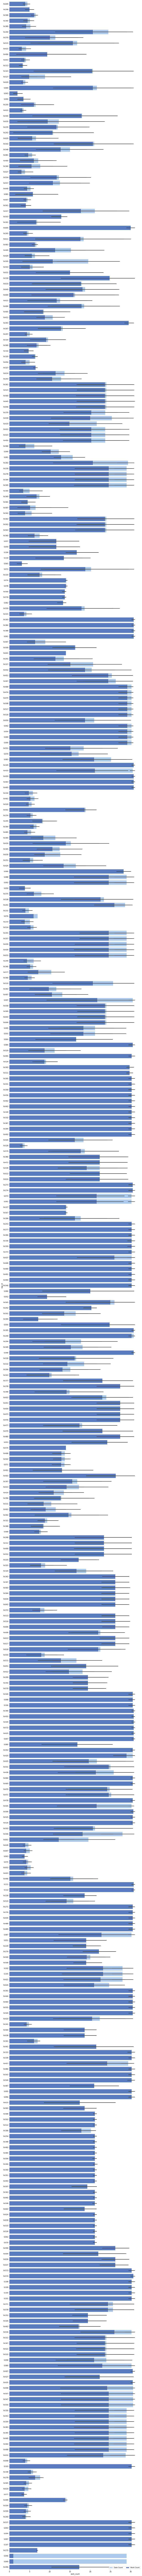

In [73]:
f, ax = plt.subplots(figsize =(15,300))

sns.set_color_codes('pastel')
sns.barplot(x ='date_count', y = 'eqp_id', data = grouped_df,
            label = 'Date Count', color = 'b', edgecolor = 'w')

sns.set_color_codes('muted')
sns.barplot(x = 'work_count', y = 'eqp_id', data = grouped_df,
            label = 'Work Count', color = 'b', edgecolor = 'w')

ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)

plt.show()

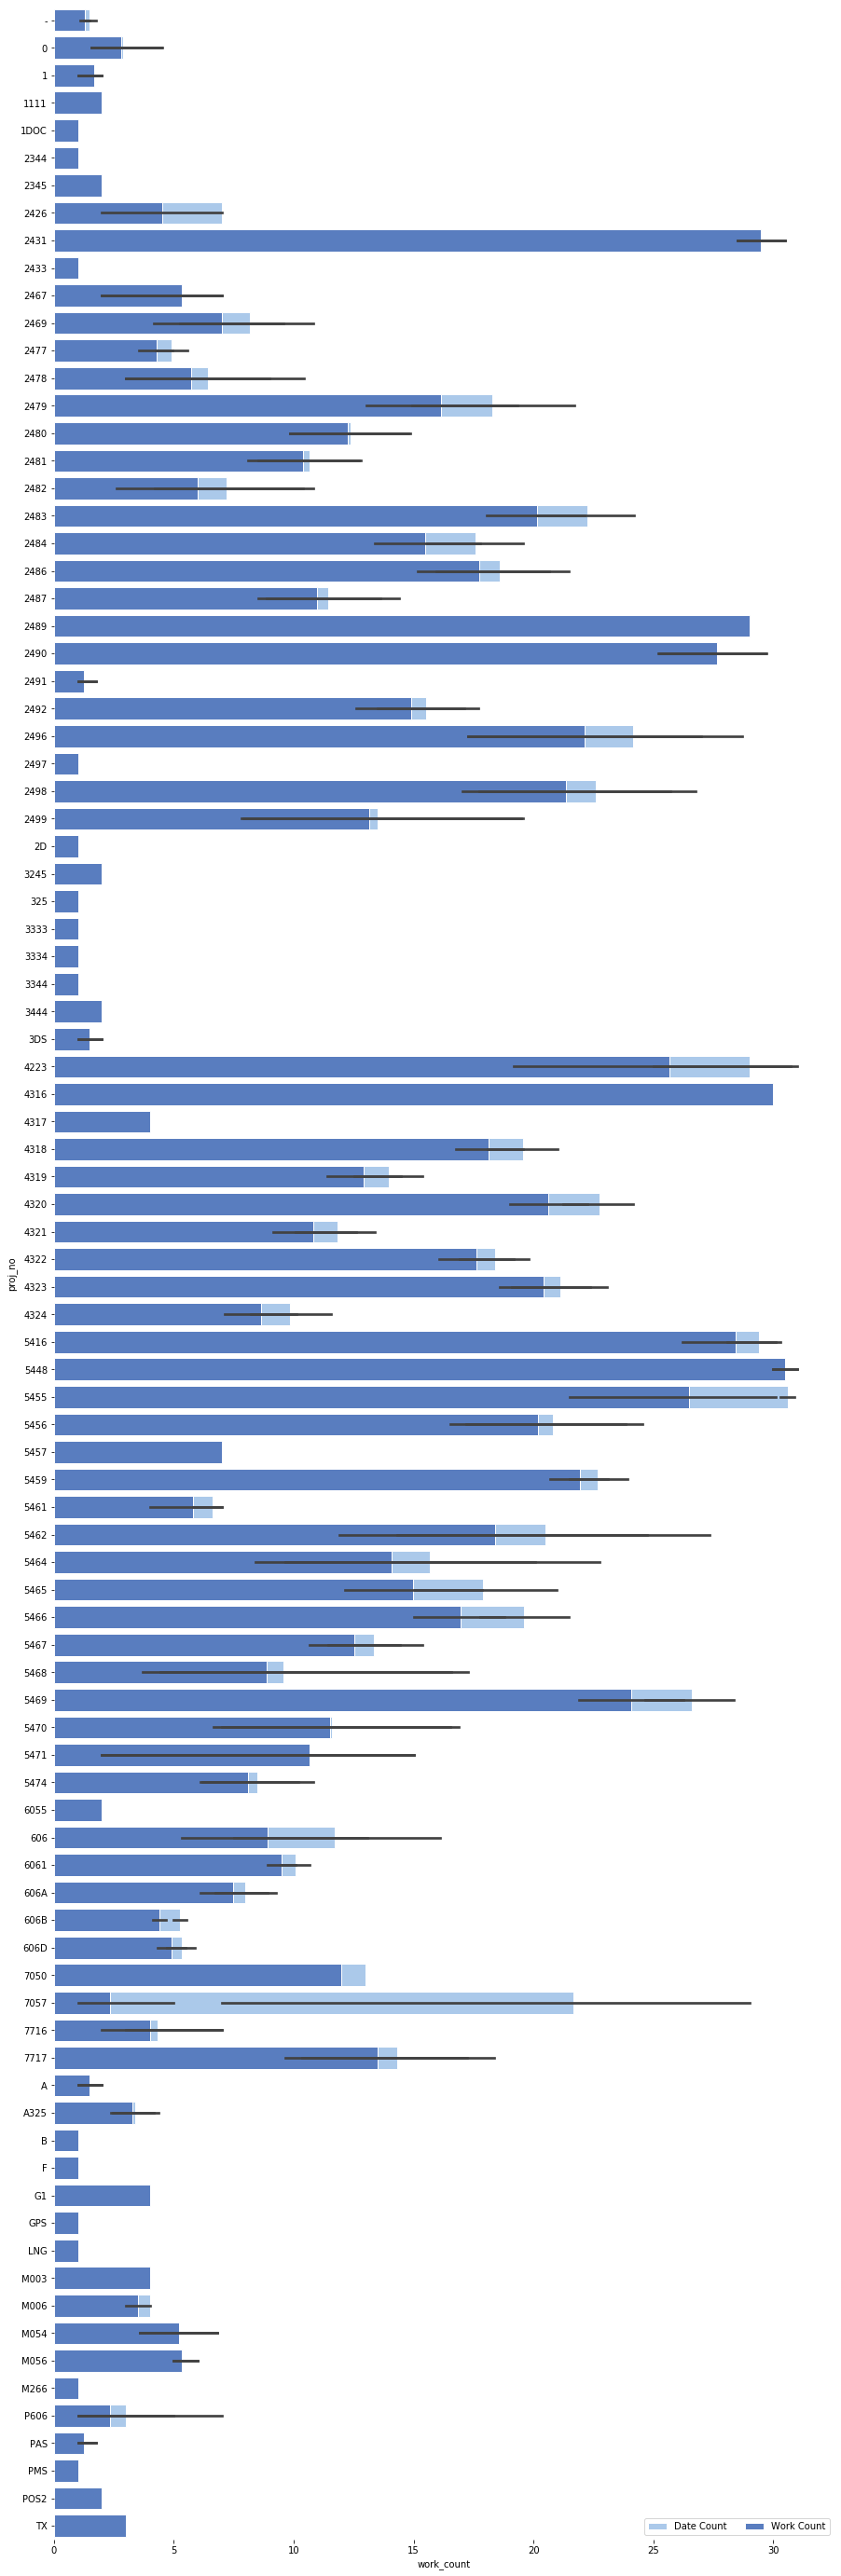

In [74]:
f, ax = plt.subplots(figsize =(15,50))

sns.set_color_codes('pastel')
sns.barplot(x ='date_count', y = 'proj_no', data = grouped_df,
            label = 'Date Count', color = 'b', edgecolor = 'w')

sns.set_color_codes('muted')
sns.barplot(x = 'work_count', y = 'proj_no', data = grouped_df,
            label = 'Work Count', color = 'b', edgecolor = 'w')

ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)

plt.show()

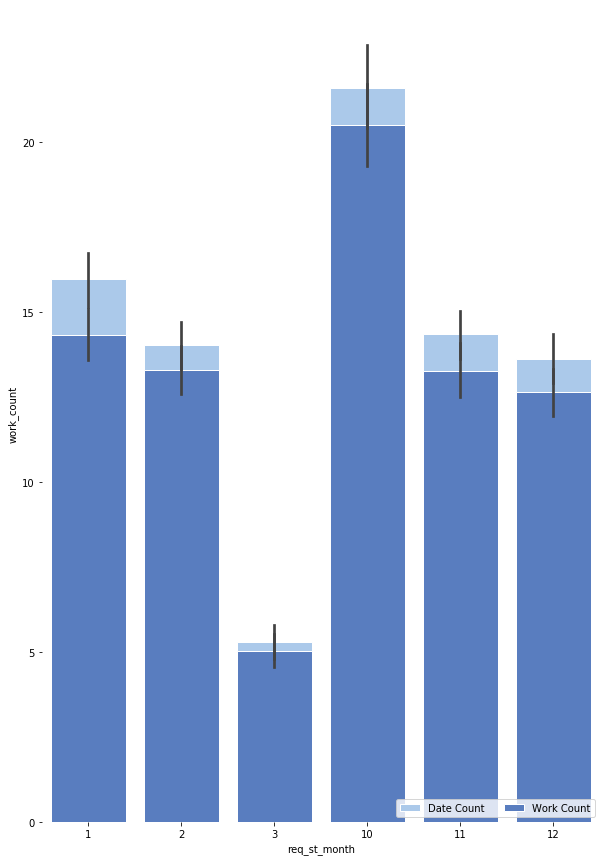

In [75]:
f, ax = plt.subplots(figsize =(10,15))

sns.set_color_codes('pastel')
sns.barplot(x ='req_st_month', y = 'date_count', data = grouped_df,
            label = 'Date Count', color = 'b', edgecolor = 'w')

sns.set_color_codes('muted')
sns.barplot(x = 'req_st_month', y = 'work_count', data = grouped_df,
            label = 'Work Count', color = 'b', edgecolor = 'w')

ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)

plt.show()